<a href="https://colab.research.google.com/github/jodejetalo99/Introduccion-al-Aprendizaje-Profundo/blob/main/IPA_T1_E1y2_JJTL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad Nacional Autónoma de México
# Instituto de Investigaciones en Matemáticas Aplicadas y en Sistemas
# Introducción al Aprendizaje Profundo
# José de Jesús Tapia López
# Tarea 1: Preceptrón y Redes Densas
# 19 de Marzo del 2021

Resuelve los siguientes ejercicios en libretas de Colab independientes que sean replicables.

## Ejercicio 1

1. Un perceptrón o neurona no es capaz de aproximar una función que separe en dos clases (naranja y azul) el conjunto de datos mostrado en la figura 1. Propón una transformación aplicada a los atributos $x_1$ y $x_2$ de forma que puedan ser separados por solo un perceptrón.
Justifica porque la transformación propuesta funciona. (2 puntos.)

Yo propondría la transformación: $x_3=\sqrt{x^2_1 + x^2_2}$ para que sean 'circularmente' separables. Esto se debe a que es la fórmula para obtener el radio de una circunferencia (Y vemos en la imagen de la tarea que parecer ser que los puntos azules forman una circunferencia y los puntos naranjas forman un círculo, donde ambos conjuntos son de distintos radios), por lo que podríamos poner u obtener por medio de algún algoritmo un umbral $u$. Así, podríamos graficar en la figura $x_1$ VS $x_3$ y ver si $x_3 > u$, entonces $x_1$ pertenece a la clase azul; pero si $x_3 \leq u$ tendríamos que $x_1$ pertenece a la clase naranja. 

Esto funcionaría ya que en la gráfica de $x_1$ VS $x_3$ estaríamos graficando $x_1$ VS los 'radios' (que son distancias). Entonces, los puntos azules quedarían por arriba de $u$ y los puntos naranjas quedarían debajo de $u$. Por lo tanto, colocaríamos en esta figura la gráfica de la recta $u$ y ahí se vería la separación de las clases con una recta.

## Ejercicio 2

Extiende el ejercicio **1c_reglin.ipynb** visto en clase para realizar regresión lineal con los dos atributos de entrada.

In [ ]:
### BIBLIOTECAS

# sistema de archivos
import os

# gráficas
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *
from matplotlib import cm
# csv
import pandas as pd
# redes neuronales
import torch
# algebra lineal
import numpy as np

# AUXILIARES

URL = 'https://raw.githubusercontent.com/bereml/iap/master/datos/califs.csv'
base_dir = '../datos'
filename = 'califs.csv'
filepath = os.path.join(base_dir, filename)



In [ ]:

# Descargamos los datos

! mkdir {base_dir}
! wget -nc {URL} -O {filepath}

mkdir: cannot create directory ‘../datos’: File exists
File ‘../datos/califs.csv’ already there; not retrieving.


In [ ]:
#Utilizamos para la lectura del csv e imprimimos los primeros 5 ejemplos.
df = pd.read_csv(filepath)
df.head(5)

,prev,horas,calif
0,5.6,8.2,5.1
1,6.7,9.3,5.9
2,5.1,10.0,5.4
3,5.7,10.4,6.5
4,7.1,10.4,6.7


In [ ]:
# Obtengamos los dos atributos 
x = torch.tensor(df.iloc[:, :2].values)
x = x.reshape(-1, 2).type(torch.float32)
print(x.shape)
x[:5]



torch.Size([50, 2])


tensor([[ 5.6000,  8.2000],
        [ 6.7000,  9.3000],
        [ 5.1000, 10.0000],
        [ 5.7000, 10.4000],
        [ 7.1000, 10.4000]])

In [ ]:
# la salida:
y_true = torch.tensor(df.iloc[:, 2].values)
y_true = y_true.view(-1, 1).type(torch.float32)
print(y_true.shape)
y_true[:5]

torch.Size([50, 1])


tensor([[5.1000],
        [5.9000],
        [5.4000],
        [6.5000],
        [6.7000]])

In [ ]:
# número de ejemplos y atributos
m, d = x.shape
m, d

(50, 2)

Graficamos en 3D para tener una idea de la distribución de los datos:


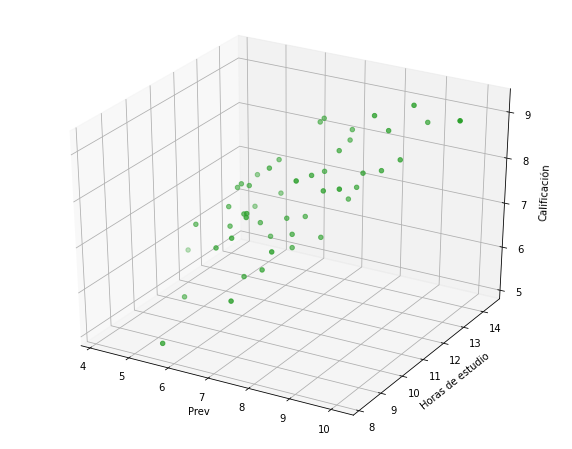

In [ ]:
# construimos la instancia de la figura
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0].view(-1).numpy(), x[:,1].view(-1).numpy(), y_true.view(-1).numpy(), c='tab:green', marker='o')

# establecemos las etiquetas de los ejes
ax.set_xlabel('Prev')
ax.set_ylabel('Horas de estudio')
ax.set_zlabel('Calificación')

plt.show()



Recordemos que dado un conjunto de ejemplos con atributos ($x_1, \dots, x_d$) y salidas $y$, la hipótesis de regresión lineal considerando un plano está dada por:
$$\hat{y} = x_1 w_1 + \dots + x_d w_d + b$$

donde $w_i$ y $b$ son pesos y sesgo (parámetros) del modelo y $\hat{y}$ la salida predicha.

En este caso:

$$\hat{y} = x_1 w_1 + x_2 w_2 + b$$


 Podemos expresar la hipótesis en su forma vectorial como:
$$\hat{y} = x w + b$$

Nuestro trabajo consiste en estimar (aprender) los parámetros $w_1, w_2$ y $b$. Por el momento supongamos que proponemos valores para los parámetros y hagamos inferencia:


De la imagen anterior podemos apreciar que parece ser que sí existe una asociación lineal entre las variables independientes (las $x's$) y la variable dependiente (la $y$)

Vamos a crear una función para colocar los parámetros $w_1, w_2$ y $b$. Por defecto, toman el valor de 0.0 cada uno. Esto con la finalidad de compara resultados cuando inicializamos en 0.0 o con valores 'aleatorios'.


In [ ]:

def parametros(w1=0.0,w2=0.0,b=0.0):
  w = torch.tensor([[w1],[w2]])
  b = torch.tensor([b])
  return w, b

w, b = parametros(w1=0.6030,w2=0.1785,b=0.0496)

# inferencia con parámetros 'aleatorios'
y_pred1 = x @ w + b


W, B = parametros()

# inferencia con los parámetros por defecto
y_pred2 = x @ W + B


In [ ]:
# preparamos los métodos para visualizar en 3D el plano

x0_s, x1_s = np.meshgrid(x[:,0].view(-1).numpy(), x[:,1].view(-1).numpy())
#np.linspace(x[:,0].view(-1).numpy().min(), x[:,0].view(-1).numpy().max(), 100),np.linspace(x[:,1].view(-1).numpy().min(), x[:,1].view(-1).numpy().max(), 100)
_, y_pred_3d = np.meshgrid(x[:,1].view(-1).numpy(), y_pred1.view(-1).numpy())

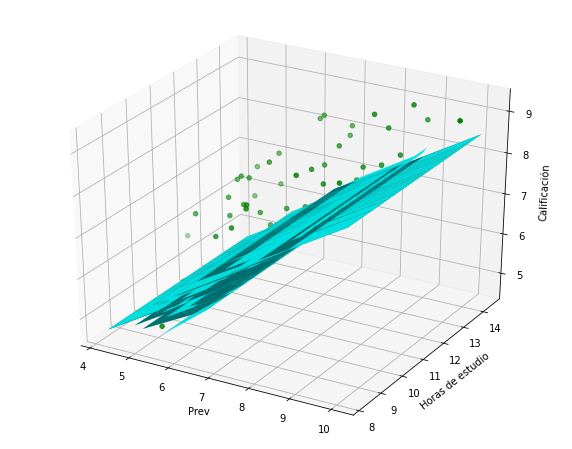

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')              
ax.plot_surface(x0_s, x1_s, y_pred_3d.T.reshape(x0_s.shape), color='cyan')
ax.scatter(x[:,0].view(-1).numpy(), x[:,1].view(-1).numpy(), y_true.view(-1).numpy(), color='green')
ax.set_xlabel('Prev')
ax.set_ylabel('Horas de estudio')
ax.set_zlabel('Calificación')

#ax.view_init(0,1)
plt.show()


Podemos observar de la imagen anterior que el plano es una aproximación decente, aunque idealmente debería ajustarse todavía mejor, ya que a ojo todo indica que debe tener más inclinación o trasladar el plano un poco más hacia arriba. 

Aquí no vale la pena colocar la imagen del plano que resultaría de la regresión cuando todos los parámetros son 0, pues este sería el plano $Calificacion = 0$ (Calificación sería el eje $z$).

Lo que sigue es calcular el error cuadrático medio de los modelos con parámetros 'aleatorios' y con parámetros que son todos 0, y utilizar el descenso por gradiente para mejorar los parámetros de las dos regresiones y obtener en ambos casos un mejor plano que se ajuste a los datos y comparar el rendimiento de cada uno.

La pérdida para los modelos es el error cuadrático medio y queda expresado de la siguiente manera:
$$ J(w, b) = \frac{1}{2m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})^2} $$

en su forma vectorial:
$$ J(w, b) = \frac{1}{2m} (\hat{y} - y)^T (\hat{y} - y) $$

Para los parámetros propuestos en los dos casos, la pérdida se puede implementar como:

In [ ]:
loss1 = (y_pred1 - y_true).T @ (y_pred1 - y_true) / (2 * m)
loss1

tensor([[0.7013]])

In [ ]:
loss2 = (y_pred2 - y_true).T @ (y_pred2 - y_true) / (2 * m)
loss2

tensor([[27.0058]])

Claramente el modelo con parámetros aleatorios es mejor que el otro, ya que su error cuadrático medio es mucho menor.

El algoritmo del gradiente descendente se basa en el gradiente de la pérdida respecto de los parámetros:
$$\frac{\partial J(w_j)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m}{x^{(i)}_j(\hat{y}^{(i)} - y^{(i)})}$$$$\frac{\partial J(b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})}$$

en su forma vectorial:
$$\Delta J(w) = \frac{1}{m} x^T (\hat{y} - y)$$$$\Delta J(b) = \frac{1}{m} \sum_{i=1}^{m}{(\hat{y} - y)^{(i)}}$$

Para los parámetros propuestos en los modelos, el cálculo del gradiente se puede implementar como:

In [ ]:
grad_w = (x.T @ (y_pred1 - y_true)) / m
grad_b = (y_pred1 - y_true).sum() / m
grad_w, grad_b

(tensor([[ -6.6975],
         [-12.5801]]), tensor(-1.0291))

In [ ]:
grad_W = (x.T @ (y_pred2 - y_true)) / m
grad_B = (y_pred2 - y_true).sum() / m
grad_W, grad_B

(tensor([[-49.9294],
         [-88.5424]]), tensor(-7.2920))

Ahora implementemos todo en una función:

In [ ]:
### Entrenamiento

# la misma función que en la de ustedes en el git, 
# solo que por defecto yo lo cambio a que sean 30 pasos
def train(x, y_true, w, b, alpha=0.01, steps=30):
    """Fits linear regression."""

    # ejemplos, atributos
    m, d = x.shape

    # histórico de pérdidas
    loss_hist = []

    # ciclo de entrenamiento
    for i in range(steps):

        # cómputo de la hipótesis
        y_pred = x @ w + b

        # cómputo de la pérdida
        loss = (y_pred - y_true).T @ (y_pred - y_true) / (2 * m)

        # cómputo del gradiente
        grad_w = (x.T @ (y_pred - y_true)) / m
        grad_b = (y_pred - y_true).sum() / m

        # actualización de parámetros
        w = w - alpha * grad_w
        b = b - alpha * grad_b

        # histórico de pérdida
        loss_hist.append(loss)

    return w, b, loss_hist



Entrenemos el modelo 1:

In [ ]:
w, b, loss_hist1 = train(x, y_true, w, b)
w, b

(tensor([[0.5533],
         [0.2817]]), tensor([0.0560]))

Entrenemos el modelo 2:

In [ ]:
W, B, loss_hist2 = train(x, y_true, W, B)
W, B

(tensor([[0.2248],
         [0.4108]]), tensor([0.0329]))

En ambos modelos, con el descenso por gradiente se vieron modificados sus parámetros para mejorar el ajuste del plano a los datos.



Grafiquemos la evolución de la pérdida de ambos modelos:


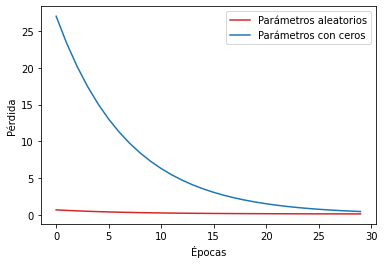

In [ ]:
plt.figure()
plt.plot(range(len(loss_hist1)), loss_hist1, color='tab:red', label='Parámetros aleatorios')
plt.plot(range(len(loss_hist2)), loss_hist2, color='tab:blue', label='Parámetros con ceros')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

Podemos notar que con el modelo en el que todos sus parámetros son 0, la pérdida es muy grande en un principio y poco a poco va convergiendo. Parece ser que aproximadamente en la época 30 es cuando ambos modelos convergen a una misma pérdida, pero el modelo con parámetros aleatorios tiene una pérdida muy baja desde las épocas iniciales.

Finalmente, vamos a graficar los planos ahora con los nuevos $w's$ y $b's$ (ya utilizando descenso por gradiente) de ambos modelos.

In [ ]:
# inferencia
y_pred1 = x @ w + b

y_pred2 = x @ W + B


In [ ]:
# preparamos los métodos para visualizar en 3D el plano

x0_s2, x1_s2 = np.meshgrid(x[:,0].view(-1).numpy(), x[:,1].view(-1).numpy())
_, y_pred1_3d2 = np.meshgrid(x[:,1].view(-1).numpy(), y_pred1.view(-1).numpy().T)
_, y_pred2_3d2 = np.meshgrid(x[:,1].view(-1).numpy(), y_pred2.view(-1).numpy().T)

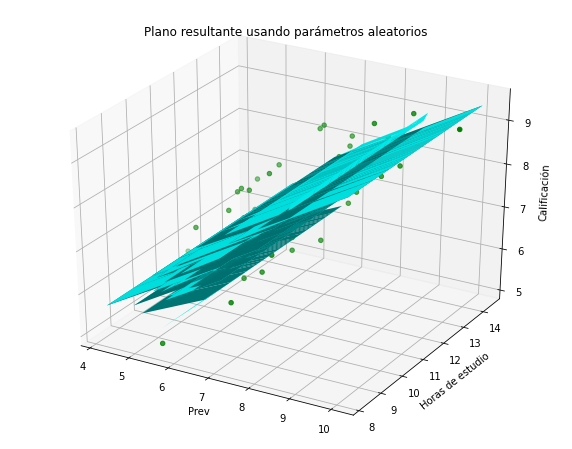

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')              
ax.plot_surface(x0_s2, x1_s2, y_pred1_3d2.T.reshape(x0_s2.shape), color='cyan')
ax.scatter(x[:,0].view(-1).numpy(), x[:,1].view(-1).numpy(), y_true.view(-1).numpy(), color='green')
ax.set_xlabel('Prev')
ax.set_ylabel('Horas de estudio')
ax.set_zlabel('Calificación')
plt.title('Plano resultante usando parámetros aleatorios')
plt.show()

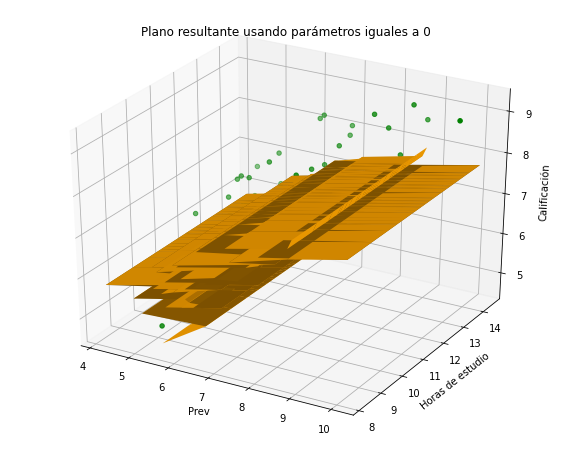

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')              
ax.plot_surface(x0_s2, x1_s2, y_pred2_3d2.T.reshape(x0_s2.shape), color='orange')
ax.scatter(x[:,0].view(-1).numpy(), x[:,1].view(-1).numpy(), y_true.view(-1).numpy(), color='green')
ax.set_xlabel('Prev')
ax.set_ylabel('Horas de estudio')
ax.set_zlabel('Calificación')
plt.title('Plano resultante usando parámetros iguales a 0')
plt.show()

A pesar que las figuras de los planos no quedaron muy bien (estuve intentando mejorarlas, pero no pude), nos damos una idea de que ambos planos son parecidos y ajustan mejor a los datos después de usar descenso por gradiente (son mejores que el que presentamos al principio), pero comprobamos que es más eficiente el modelo con parámetros inicializados aleatoriamente (no ceros) ya que converge mucho más rápido a las soluciones óptimas (y esto lo observamos en las dos figuras anteriores, pues el plano azul se ajusta a la nube de puntos que el naranja).

De manera general, por lo que entiendo:

* Las redes neuronales tienden a quedarse atascadas en mínimos locales, por lo que es una buena idea darles muchos valores iniciales diferentes. No puede hacer eso si todos comienzan en cero.

* Si las neuronas comienzan con los mismos pesos, todas las neuronas seguirán el mismo gradiente y siempre terminarán haciendo lo mismo entre sí.

Por ello, es mejor brindar parámetros aleatorios.

